# STAT3612 Lecture 8 - Tree-based Methods

[Dr. Aijun Zhang](http://www.statsoft.org) - [STAT3612 Data Mining](http://www.statsoft.org/teaching/stat3612/)

28 March 2019

# Regression Tree

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
Y = y + np.random.randn(m, 1) / 10

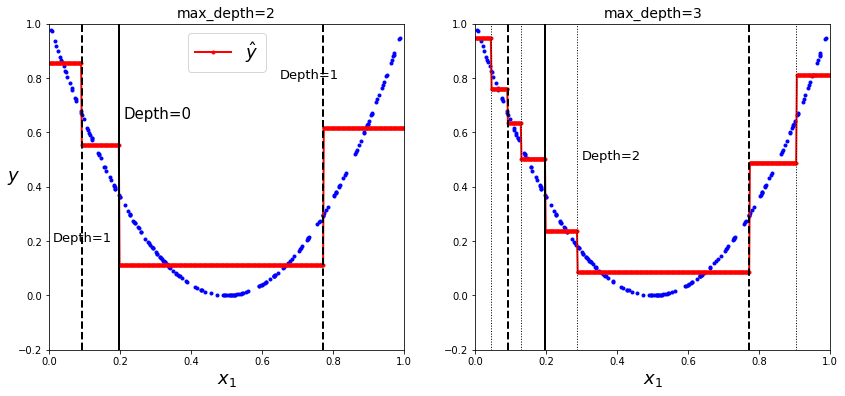

In [2]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, Y)
tree_reg2.fit(X, Y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)
plt.show()

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

iris = load_iris()
X = iris.data[:, 0:2] # Sepal length and width
y = iris.data[:,3]

tree_reg = DecisionTreeRegressor(max_depth=2).fit(X, y)


export_graphviz(
        tree_reg,
        out_file="iris_tree1.dot",
        feature_names=iris.feature_names[0:2],
        class_names=iris.feature_names[3],
        rounded=True,
        filled=True
    )

!dot -Tpng iris_tree1.dot -o iris_tree1.png

Fontconfig warning: ignoring UTF-8: not a valid region tag


![Regression Tree](iris_tree1.png)

# Classification Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier

X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2).fit(X, y)


export_graphviz(
        tree_clf,
        out_file="iris_tree2.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

!dot -Tpng iris_tree2.dot -o iris_tree2.png

Fontconfig warning: ignoring UTF-8: not a valid region tag


![Classification Tree](iris_tree2.png)

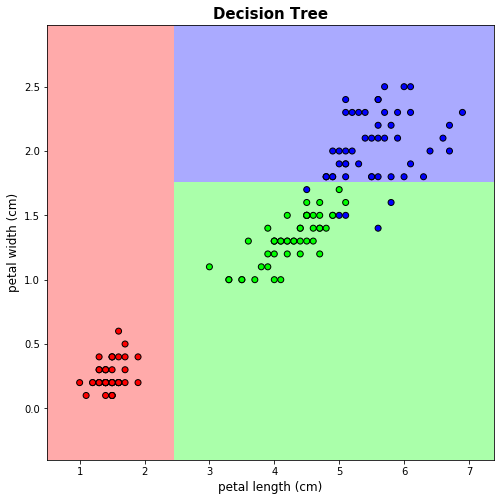

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
cmap_light = col.ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = col.ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(8, 8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=cmap_bold)
plt.xlabel(iris["feature_names"][2], fontsize=12)
plt.ylabel(iris["feature_names"][3], fontsize=12)
plt.title("Decision Tree", fontsize=15, fontweight="bold")
plt.show()

In [6]:
from sklearn.tree import DecisionTreeClassifier

X = iris.data 
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=4).fit(X, y)


export_graphviz(
        tree_clf,
        out_file="iris_tree3.dot",
        feature_names=iris.feature_names,
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

!dot -Tpng iris_tree3.dot -o iris_tree3.png

Fontconfig warning: ignoring UTF-8: not a valid region tag


![Classification Tree](iris_tree3.png)